## Divide into Broad Segments
* single candidate followers
* all 4/5 candidates
* no candidates
To check behavioral differences, validate single candidate followers as a segment

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 1000)

In [2]:
all_users = pandas.read_csv('DATA/GT_10_STORIES/all.csv', 
                          dtype={'candidates': 'S10'},
                         index_col=0)

In [3]:
print all_users.columns
len(all_users.author.unique())

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates'],
      dtype='object')


20964

In [4]:
with_emot = pandas.read_csv('DATA/FOR_CORR/all_fields_no_body.csv', 
                            index_col=0)

In [5]:
print len(with_emot) # Number of Stories with emotional analysis

2651


In [6]:
print ", ".join(with_emot.columns)
print
print ", ".join(all_users.columns)

url, title, sentiment_mean, num_tweets, wc, negativ_ct, positiv_ct, negativ_percent, positiv_percent, emotionality, positivity

_id, author, sentiment, time, tweet, url, a_id, title, date_written, org, t_id, candidates


In [7]:
#all_users = all_users.drop_duplicates('author')
#all_users = all_users[all_users.candidates.notnull()]
print len(all_users.author.unique())

20964


## Segments are:
* only one candidate
* more than one candidate
* all four or 5 candidates
* no candidates

In [8]:
all_users['candid_ct'] = all_users.candidates.apply(lambda x: x.count('1') if x else 0)

In [9]:
len(all_users.author.unique())

20964

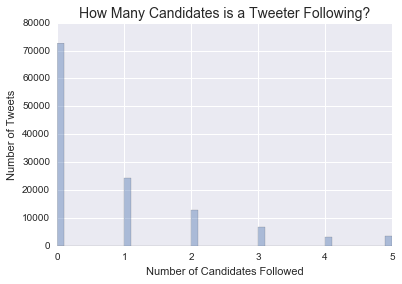

In [10]:
#all_users.candid_ct.hist(bins=5)
sns.distplot(all_users.candid_ct, kde=False, rug=False);
plt.title('How Many Candidates is a Tweeter Following?', fontsize=14)
plt.xlabel("Number of Candidates Followed")
plt.ylabel("Number of Tweets")
#plt.savefig('FIGS/CORR/SEGMENTS/candid_ct_dist.png')

In [11]:
df_0 = all_users[all_users.candid_ct == 0]
df_1 = all_users[all_users.candid_ct == 1]
df_gt_1 = all_users[all_users.candid_ct > 1]
df_gt_2 = all_users[all_users.candid_ct > 2]
df_gt_3 = all_users[all_users.candid_ct > 3]

In [12]:
print len(df_0)
print len(df_1)
print len(df_gt_1)
print len(df_gt_2)
print len(df_gt_3)

72623
24457
26046
13130
6561


In [13]:
print len(df_0.title.unique())
print len(df_1.title.unique())
print len(df_gt_1.title.unique())
print len(df_gt_2.title.unique())
print len(df_gt_3.title.unique())

2648
2587
2548
2316
1842


In [14]:
df_0['num_tweets'] = df_0.groupby(['title']).transform('count').url
df_0 = df_0.drop_duplicates('title')
df_0 = pandas.merge(df_0, with_emot,how='left', on=['title', 'title'])
df_0.rename(columns={'url_x': 'url','num_tweets_x':'num_tweets','num_tweets_y':'num_tweets_all'}, inplace=True)
df_0 = df_0.dropna()
df_0[['url','org','candid_ct','num_tweets','num_tweets_all','sentiment_mean',
             'wc','negativ_ct','positiv_ct','negativ_percent','positiv_percent',
             'emotionality','positivity']].to_csv("DATA/FOR_CORR/GROUPBY_FOLLOWING/following_0.csv", index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_1['num_tweets'] = df_1.groupby(['title']).transform('count').url
df_1 = df_1.drop_duplicates('title')
df_1 = pandas.merge(df_1, with_emot,how='left', on=['title', 'title'])
df_1.rename(columns={'url_x': 'url','num_tweets_x':'num_tweets','num_tweets_y':'num_tweets_all'}, inplace=True)
df_1 = df_1.dropna()
df_1[['url','org','candid_ct','num_tweets','num_tweets_all','sentiment_mean',
             'wc','negativ_ct','positiv_ct','negativ_percent','positiv_percent',
             'emotionality','positivity']].to_csv("DATA/FOR_CORR/GROUPBY_FOLLOWING/following_1.csv", index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df_gt_1['num_tweets'] = df_gt_1.groupby(['title']).transform('count').url
df_gt_1 = df_gt_1.drop_duplicates('title')
df_gt_1 = pandas.merge(df_gt_1, with_emot,how='left', on=['title', 'title'])
df_gt_1.rename(columns={'url_x': 'url','num_tweets_x':'num_tweets','num_tweets_y':'num_tweets_all'}, inplace=True)
df_gt_1 = df_gt_1.dropna()
df_gt_1[['url','org','candid_ct','num_tweets','num_tweets_all','sentiment_mean',
             'wc','negativ_ct','positiv_ct','negativ_percent','positiv_percent',
             'emotionality','positivity']].to_csv("DATA/FOR_CORR/GROUPBY_FOLLOWING/following_gt_1.csv", index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df_gt_2['num_tweets'] = df_gt_2.groupby(['title']).transform('count').url
df_gt_2 = df_gt_2.drop_duplicates('title')
df_gt_2 = pandas.merge(df_gt_2, with_emot,how='left', on=['title', 'title'])
df_gt_2.rename(columns={'url_x': 'url','num_tweets_x':'num_tweets','num_tweets_y':'num_tweets_all'}, inplace=True)
df_gt_2 = df_gt_2.dropna()
df_gt_2[['url','org','candid_ct','num_tweets','num_tweets_all','sentiment_mean',
             'wc','negativ_ct','positiv_ct','negativ_percent','positiv_percent',
             'emotionality','positivity']].to_csv("DATA/FOR_CORR/GROUPBY_FOLLOWING/following_gt_2.csv", index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
df_gt_3['num_tweets'] = df_gt_3.groupby(['title']).transform('count').url
df_gt_3 = df_gt_3.drop_duplicates('title')
df_gt_3 = pandas.merge(df_gt_3, with_emot,how='left', on=['title', 'title'])
df_gt_3.rename(columns={'url_x': 'url','num_tweets_x':'num_tweets','num_tweets_y':'num_tweets_all'}, inplace=True)
df_gt_3 = df_gt_3.dropna()
df_gt_3[['url','org','candid_ct','num_tweets','num_tweets_all','sentiment_mean',
             'wc','negativ_ct','positiv_ct','negativ_percent','positiv_percent',
             'emotionality','positivity']].to_csv("DATA/FOR_CORR/GROUPBY_FOLLOWING/following_gt_3.csv", index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
print df_gt_3.columns

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates', u'candid_ct',
       u'num_tweets', u'url_y', u'sentiment_mean', u'num_tweets_all', u'wc',
       u'negativ_ct', u'positiv_ct', u'negativ_percent', u'positiv_percent',
       u'emotionality', u'positivity'],
      dtype='object')
